In [1]:
import os

# --- Add these lines at the very top of your script ---
# This must be done BEFORE importing numpy or other scientific libraries.
os.environ['OMP_NUM_THREADS'] = '1'

os.environ['MKL_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['VECLIB_MAXIMUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
from NEGF_device_generation import UnitCell
from device import Device
from device_hamiltonian import Hamiltonian
from lead_self_energy import LeadSelfEnergy
from charge import Charge
from rgf import GreensFunction

In [6]:
dev = Device(0.5431 * 1e-9, 0.5431 * 1e-9, 0.5431 * 1e-9, equilibrium=False)
ham = Hamiltonian(dev) 
charge_obj =Charge(dev)
gf = GreensFunction(dev, ham, self_energy_method="transfer")
sum(gf.compute_density_of_states(E=0.5, equilibrium=False, use_rgf=True, self_energy_method="transfer"))

np.float64(0.08150301632019406)

In [7]:
dev.unitCell.ATOM_POSITIONS

[Atom(0, 0, 0),
 Atom(0.0, 0.5, 0.5),
 Atom(0.25, 0.25, 0.25),
 Atom(0.25, 0.75, 0.75),
 Atom(0.5, 0.0, 0.5),
 Atom(0.5, 0.5, 0.0),
 Atom(0.75, 0.25, 0.75),
 Atom(0.75, 0.75, 0.25)]

In [ ]:
dev = Device(0.5431 * 1e-9, 0.5431 * 1e-9, 0.5431 * 1e-9, equilibrium=False)
ham = Hamiltonian(dev) 
charge_obj =Charge(dev)

gf = GreensFunction(dev, hamiltonian=ham)



In [ ]:
lse = LeadSelfEnergy(dev, ham)

In [ ]:
X = lse.self_energy("right", 0, method="sancho_rubio")
X[:31,:31]

In [ ]:
import time

import matplotlib.pyplot as plt

methods = ["sancho_rubio", "iterative", "transfer"]
lengths = [0.5431 * n * 1e-9 for n in [5, 10, 20, 40, 80, 160]]
timings = {method: [] for method in methods}

for L in lengths:
    dev_test = Device(L, 0.5431 * 2e-9, 0.5431 * 5e-9)
    ham_test = Hamiltonian(dev_test)
    for method in methods:
        lse_test = LeadSelfEnergy(dev_test, ham_test)
        start = time.time()
        try:
            lse_test.self_energy("right", 0, method=method)
        except Exception as e:
            timings[method].append(float('nan'))
            continue
        end = time.time()
        timings[method].append(end - start)

plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot([L * 1e9 for L in lengths], timings[method], marker='o', label=method)
plt.xlabel('Device Length (nm)')
plt.ylabel('Time (s)')
plt.title('Self-Energy Method Timing vs Device Length')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

In [2]:
dev = Device(0.5431 * 3e-9, 0.5431 * 3e-9, 0.5431 * 3e-9, equilibrium=False)
ham = Hamiltonian(dev) 
charge_obj =Charge(dev)

gf = GreensFunction(dev, hamiltonian=ham)


energy, DOS = charge_obj.calculate_DOS(equilibrium=False)


Calculating DOS with 200 
Using sancho_rubio method for surface Green's functions
Starting DOS calculations for 200 energy pts...


DOS calculation completed in 37.81 seconds
DOS data saved to dos_data.txt


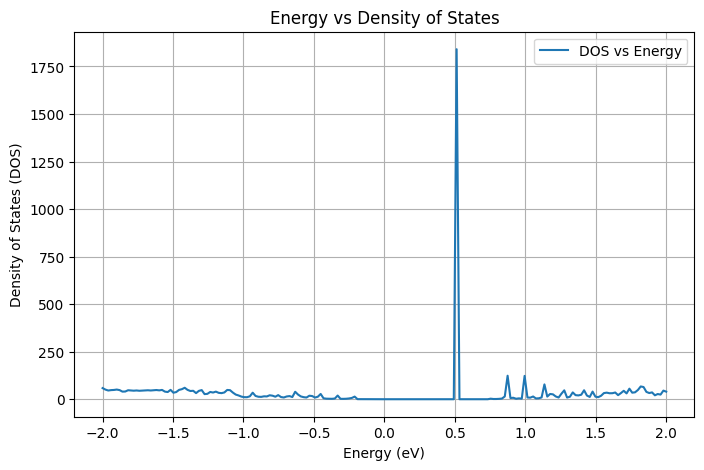

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(energy, DOS, label='DOS vs Energy')
plt.xlabel('Energy (eV)')
plt.ylabel('Density of States (DOS)')
plt.title('Energy vs Density of States')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from rgf import GreensFunction

GF = GreensFunction(dev, ham, self_energy_method="sancho_rubio")

sum(GF.compute_density_of_states(1.2))